In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [42]:
from sklearn.datasets import load_boston

In [43]:
boston=load_boston()

In [44]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [45]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [46]:
print(boston.data)

[[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   1.53000000e+01
    3.96900000e+02   4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.96900000e+02   9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.92830000e+02   4.03000000e+00]
 ..., 
 [  6.07600000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   5.64000000e+00]
 [  1.09590000e-01   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.93450000e+02   6.48000000e+00]
 [  4.74100000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   7.88000000e+00]]


In [47]:
dataset = pd.DataFrame(boston.data,columns=boston.feature_names)

In [48]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [50]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [51]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


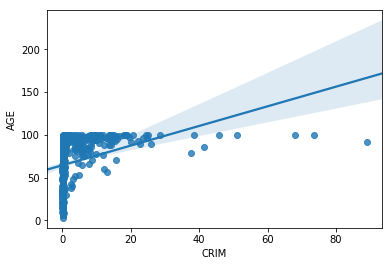

In [52]:
sns.regplot(x="CRIM",y="AGE",data=dataset) 

In [53]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [54]:
# dependent and independent 
x = dataset.drop("LSTAT",axis=1)
y = dataset["LSTAT"]

In [55]:
# spliting Train test
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
x_train_scaled = scaler.fit_transform(x_train)

In [64]:
x_test_scaled = scaler.transform(x_test)

In [65]:
import pickle
pickle.dump(scaler,open('Scaling1.pkl','wb'))

In [86]:
pickle_model.predict(input_data)

array([ 9.31019999])

In [66]:
# model trainin
from sklearn.linear_model import LinearRegression

In [67]:
regression=LinearRegression()

In [68]:
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
regression_Pred=regression.predict(x_test)

In [70]:
regression_Pred

array([ 11.11866059,   4.5330584 ,  16.2042725 ,   7.13568436,
        16.90250898,  11.23756508,  14.39091018,  15.40377711,
        15.10879875,  13.98077479,  12.85333294,  14.01228057,
        29.76759181,   9.97465287,  14.3984906 ,  11.12078721,
        16.39683409,  24.14218464,   1.33670088,  18.07531796,
         7.50580498,   7.56505199,  16.72994047,  10.83900943,
        19.00734618,  20.00399971,  10.14064268,  18.21928999,
        12.41823284,  14.39947661,  15.12549795,   9.56009353,
        13.13698035,  21.844516  ,  17.34640004,  20.32670089,
         6.20151108,  11.99463676,   9.68210583,   6.33524382,
        16.32533986,   8.96072015,   0.97429917,  11.37508112,
         9.6831293 ,  19.68660822,  16.78967506,   5.55647968,
        15.41368824,   9.31019999,  13.63575139,   5.06746768,
        14.37527324,   9.6211277 ,   4.73352349,  12.62284571,
        18.0458442 ,   6.35565782,   8.53979686,  14.73175025,
         8.14584282,   4.57587907,   6.53075499,  14.06

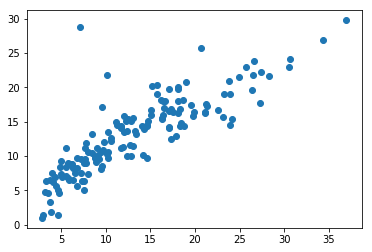

In [71]:
plt.scatter(y_test,regression_Pred)

In [72]:
residuals=y_test-regression_Pred

In [73]:
residuals.head()

173   -2.078661
274   -1.003058
491    1.865728
72    -1.615684
452    0.367491
Name: LSTAT, dtype: float64

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [75]:
print (mean_absolute_error(y_test,regression_Pred))
print (mean_squared_error(y_test,regression_Pred))

2.79146868283
14.7521830742


New prediction

In [76]:
boston.data[0].shape

(13,)

In [77]:
boston.data[0].reshape(1,-1).shape

(1, 13)

In [78]:
boston.data[0].reshape(1,-1)

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
          0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
          6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
          2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
          4.98000000e+00]])

In [79]:
input_data = np.reshape(boston.data[0][:12], (1, 12))

In [80]:
input_data.shape

(1, 12)

In [81]:
prediction = regression.predict(input_data)

In [82]:
print("Prediction:", prediction)

Prediction: [ 9.31019999]


In [83]:
import pickle

In [84]:
pickle.dump(regression,open('Regretionmodel.pkl','wb'))

In [85]:
pickle_model=pickle.load(open('Regretionmodel.pkl','rb'))

In [40]:
pickle_model.predict(input_data)

array([ 9.31019999])